## Step 1 Data Preprocessing

### Step 1-1 维基百科中文语料的处理
Corpus data
* Name: 维基百科中文语料
* Source: https://ftp.acc.umu.se/mirror/wikimedia.org/dumps/zhwiki/20191120/zhwiki-20191120-pages-articles-multistream.xml.bz2

直接下载下来的维基百科语料 是一个带有诸多html和markdown标记的文本压缩包，基本不能直接使用。
对此语料做解压与转存有两种工具可以选择：
- wikiextractor
https://github.com/attardi/wikiextractor

`pip install wikiextractor`

`python -m wikiextractor.WikiExtractor -b 500M -o output_filename zhwiki-20191120-pages-articles-multistream.xml.bz2`

-b 1000M表示的是以1000M为单位进行切分，有时候可能语料太大，我们可能需要切分成几个小的文件（默认）

参考：[维基百科简体中文语料的提取](https://zhuanlan.zhihu.com/p/39960476)

- gensim的 WikiCorpus



然而这两种主流的处理方法都存在一些缺陷。
Wikipedia Extractor提取出来的结果会去掉大括号标记的内容，这样会导致以下情形：西方语言中“数学”（；）一词源自于古希腊语的（）
这是因为括号里的词带有大括号标记被清空了。
得到的结果中残留有大量类似如下的HTML标记 `<doc id="4007115" url="?curid=4007115" title="聖馬爾庫">`

按照网上的教程，直接使用gensim.corpora.wikicorpus.WikiCorpus处理问题更为严重，因为它连所有标点都去掉了。得到的结果既有繁体字，也有简体字，也不只有中文，还有少部分英文。

参考：https://rilzob.com/2019/12/03/%E4%B8%AD%E6%96%87%E7%BB%B4%E5%9F%BA%E7%99%BE%E7%A7%91%E8%AF%AD%E6%96%99%E7%9A%84%E8%8E%B7%E5%8F%96%E4%B8%8E%E5%A4%84%E7%90%86/

https://spaces.ac.cn/archives/4176


### Step 1-1 维基百科中文语料的处理

#### Part 1 数据提取

In [2]:
# -*- coding: utf-8 -*-
# logging主要用于输出运行日志
import logging
import os.path
import sys
# optparse主要用于添加参数设置, a library for parsing command-line options
from optparse import OptionParser
# gensim中 专门处理WikiCorpus的类
from gensim.corpora import WikiCorpus

# 处理WikiCorpus的函数，infile, outfile参数需要在parser = OptionParser()中添加
def parse_corpus(infile, outfile):
    '''parse the corpus of the infile into the outfile'''
    space = ' '
    i = 0
    with open(outfile, 'w', encoding='utf-8') as fout:
        # gensim中的维基百科处理类WikiCorpus
        wiki = WikiCorpus(infile, lemmatize=False, dictionary={})  
        for text in wiki.get_texts():
            fout.write(space.join(text) + '\n')
            i += 1
            if i % 10000 == 0:
                logger.info('Saved ' + str(i) + ' articles')
    return i

# 程序主函数
def wiki_corpus_main():
    # 解析参数
    parser = OptionParser()
    # infile中default中添加未处理过的wiki压缩包文件名称
    parser.add_option('-i','--input',dest='infile',default='zhwiki-20191120-pages-articles-multistream.xml.bz2',help='input: Wiki corpus')
    # outfile为输出处理好的语料文件名称，默认corpus.zhwiki.txt
    parser.add_option('-o','--output',dest='outfile',default='01_corpus.zhwiki.txt',help='output: Wiki corpus')
    # 初始化args为空list，否则在jupyter notebook中会报错
    args = []
    # 读取parser中的参数
    (options,args) = parser.parse_args(args = [])

    infile = options.infile
    outfile = options.outfile

    try:
        # 处理语料parse_corpus函数，接收的参数为parser中的infile, outfile设置的参数
        i = parse_corpus(infile, outfile)
        logger.info('Finished Saved ' + str(i) + 'articles')
    except Exception as err:
        logger.info(err)
        
        
if __name__ == '__main__':
    # 返回当前运行的py文件名称
    program = os.path.basename(sys.argv[0])
    # logging.basicConfig函数中，可以指定日志的输出格式format，这个参数可以输出很多有用的信息
    # %(asctime)s: 打印日志的时间     %(levelname)s: 打印日志级别名称      %(message)s: 打印日志信息
    logging.basicConfig(level = logging.INFO, format = '%(asctime)s - %(levelname)s - %(message)s')
    # logging.getLogger(name)方法进行初始化，name可以不填。通常logger的名字我们对应模块名
    logger = logging.getLogger(program)  # logging.getLogger(logger_name)
    # logger.info打印程序运行是正常的信息，用于替代print输出
    logger.info('running ' + program + ': parse the chinese corpus')
    # 运行程序主函数
    wiki_corpus_main()


2021-02-03 21:21:33,466 - INFO - running ipykernel_launcher.py: parse the chinese corpus
2021-02-03 21:21:59,686 - INFO - Saved 10000 articles
2021-02-03 21:22:22,972 - INFO - Saved 20000 articles
2021-02-03 21:22:41,189 - INFO - Saved 30000 articles
2021-02-03 21:22:58,278 - INFO - Saved 40000 articles
2021-02-03 21:23:17,183 - INFO - Saved 50000 articles
2021-02-03 21:23:36,386 - INFO - Saved 60000 articles
2021-02-03 21:23:53,678 - INFO - Saved 70000 articles
2021-02-03 21:24:11,002 - INFO - Saved 80000 articles
2021-02-03 21:24:27,757 - INFO - Saved 90000 articles
2021-02-03 21:24:44,290 - INFO - Saved 100000 articles
2021-02-03 21:25:07,145 - INFO - Saved 110000 articles
2021-02-03 21:25:25,866 - INFO - Saved 120000 articles
2021-02-03 21:25:46,051 - INFO - Saved 130000 articles
2021-02-03 21:26:06,371 - INFO - Saved 140000 articles
2021-02-03 21:26:27,157 - INFO - Saved 150000 articles
2021-02-03 21:26:47,563 - INFO - Saved 160000 articles
2021-02-03 21:27:07,904 - INFO - Saved 1

#### Part 2 把WIKI数据里面的繁体字转成简体

Conversion from Traditional Chinese to Simplied Chinese
* Lib: OpenCC
* Source: https://github.com/BYVoid/OpenCC
* Install: pip install opencc-python-reimplemented

In [4]:
# -*- coding: utf-8 -*-

import os, sys
import logging
# optparse主要用于添加参数设置
from optparse import OptionParser
# opencc主要处理中文繁体转简体，安装命令pip install opencc-python-reimplemented
from opencc import OpenCC


# 处理繁体转简体主函数，infile, outfile参数在需要在parser = OptionParser()中添加
def zh_wiki_t2s(infile, outfile):
    '''convert the traditional Chinese of infile into the simplified Chinese of outfile'''
    # 读取已提取的wiki语料txt文件
    t_corpus = []
    with open(infile,'r',encoding='utf-8') as f:
        for line in f:
            line = line.replace('\n', '').replace('\t','')
            t_corpus.append(line)
    logger.info('read traditional file finished!')

    # convert the t_Chinese to s_Chinese
    cc = OpenCC('t2s')
    s_corpus = []
    for i,line in zip(range(len(t_corpus)),t_corpus):
        if i % 1000 == 0:
            logger.info('convert t2s with the {}/{} line'.format(i,len(t_corpus)))
        # s_corpus.append(OpenCC.convert(line))
        s_corpus.append(cc.convert(line))
    logger.info('convert t2s finished!')

    # 把已转换为简体的s_corpus，写入输出文件
    with open(outfile, 'w', encoding='utf-8') as f:
        for line in s_corpus:
            f.writelines(line + '\n')
    logger.info('write the simplified file finished!')

# 程序主函数
def t2s_main():   
    # 解析参数
    parser = OptionParser()
    # infile中 default中 添加wiki在步骤一中 已经提取的txt文件
    parser.add_option('-i','--input',dest='input_file',default='01_corpus.zhwiki.txt',help='traditional file')
    # outfile为输出处理好的繁体转简体文件名称，默认corpus.zhwiki.simplified.txt
    parser.add_option('-o','--output',dest='output_file',default='02_corpus.zhwiki.simplified.txt',help='simplified file')
    # 初始化args为空list，否则在jupyter notebook中会报错
    args = []
    # 读取parser中的参数
    (options,args) = parser.parse_args(args = [])
    
    input_file = options.input_file
    output_file = options.output_file

    try:
        # 处理语料zh_wiki_t2s函数，接收的参数为parser中的infile, outfile设置的参数
        zh_wiki_t2s(infile=input_file,outfile=output_file)
        logger.info('Traditional Chinese to Simplified Chinese Finished')
    except Exception as err:
        logger.info(err)
        
        
if __name__ == '__main__':
    # 返回当前运行的py文件名称
    program = os.path.basename(sys.argv[0])
    # logging.getLogger(name)方法进行初始化，name可以不填。通常logger的名字我们对应模块名
    logger = logging.getLogger(program)
    # logging.basicConfig函数中，可以指定日志的输出格式format，这个参数可以输出很多有用的信息
    # %(asctime)s: 打印日志的时间     %(levelname)s: 打印日志级别名称      %(message)s: 打印日志信息
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
    # logger.info打印程序运行是的正常的信息，用于替代print输出
    logger.info('running ' + program + ' : convert Traditional Chinese to Simplified Chinese')
    # 运行程序主函数
    t2s_main()

2021-02-03 22:00:10,679 - INFO - running ipykernel_launcher.py : convert Traditional Chinese to Simplified Chinese
2021-02-03 22:00:16,569 - INFO - read traditional file finished!
2021-02-03 22:00:16,585 - INFO - convert t2s with the 0/350025 line
2021-02-03 22:00:32,848 - INFO - convert t2s with the 1000/350025 line
2021-02-03 22:00:44,416 - INFO - convert t2s with the 2000/350025 line
2021-02-03 22:00:55,490 - INFO - convert t2s with the 3000/350025 line
2021-02-03 22:01:05,240 - INFO - convert t2s with the 4000/350025 line
2021-02-03 22:01:15,595 - INFO - convert t2s with the 5000/350025 line
2021-02-03 22:01:24,012 - INFO - convert t2s with the 6000/350025 line
2021-02-03 22:01:33,845 - INFO - convert t2s with the 7000/350025 line
2021-02-03 22:01:42,919 - INFO - convert t2s with the 8000/350025 line
2021-02-03 22:01:51,358 - INFO - convert t2s with the 9000/350025 line
2021-02-03 22:02:00,575 - INFO - convert t2s with the 10000/350025 line
2021-02-03 22:02:09,609 - INFO - convert 

#### Part 3 把WIKI数据里面的英文字符和空格空行去掉

In [5]:
# -*- coding: utf-8 -*-

import os, sys
import logging
from optparse import OptionParser
import re

# 去掉语料中 英文、空格和多余字符 的主函数，infile, outfile参数在需要在parser = OptionParser()中添加
def remove_en_blank(infile,outfile):
    '''remove the english word and blank from infile, and write into outfile'''
    with open(infile,'r',encoding='utf-8') as fin, open(outfile,'w',encoding='utf-8') as fout:
        relu1 = re.compile(r'[a-zA-Z]')  # delete english char and blank
        relu2 = re.compile(r'-\{.*?(zh-hans|zh-cn):([^;]*?)(;.*?)?\}-')
        relu3 = re.compile(r'[（\(][，；。？！\s]*[）\)]')
        relu4 = re.compile(r'[「『]')
        relu5 = re.compile(r'[」』]')

        i = 0
        for line in fin:
            res = relu1.sub('', line)
            res = relu2.sub('\2', line)
            res = relu3.sub('', line)
            res = relu4.sub('“', line)
            res = relu5.sub('”', line)          
            fout.write(res)
            i += 1
            if i % 1000 == 0:
                logger.info('handing with the {} line'.format(i))

# 程序主函数
def remove_en_blank_main():
    # 解析参数
    parser = OptionParser()
    # infile中default中添加wiki处理过的繁体转简体的txt文件名称
    parser.add_option('-i','--input',dest='infile',default='02_corpus.zhwiki.simplified.txt',help='input file to be preprocessed')
    # outfile为输出处理好的语料文件名称，默认corpus.zhwiki.simplified.done.txt
    parser.add_option('-o','--output',dest='outfile',default='03_corpus.zhwiki.simplified.done.txt',help='output file removed english and blank')
    # 初始化args为空list，否则在jupyter notebook中会报错
    args = []
    # 读取parser中的参数
    (options,args) = parser.parse_args(args = [])

    infile = options.infile
    outfile = options.outfile

    try:
        # 处理语料remove_en_blank函数，接收的参数为parser中的infile, outfile设置的参数
        remove_en_blank(infile, outfile)
        logger.info('remove english and blank finished')
    except Exception as err:
        logger.info(err)    
    
    
if __name__ == '__main__':
    # 返回当前运行的py文件名称
    program = os.path.basename(sys.argv[0])
    # logging.basicConfig函数中，可以指定日志的输出格式format，这个参数可以输出很多有用的信息
    # %(asctime)s: 打印日志的时间     %(levelname)s: 打印日志级别名称      %(message)s: 打印日志信息
    logging.basicConfig(level = logging.INFO, format = '%(asctime)s - %(levelname)s - %(message)s')
    # logging.getLogger(name)方法进行初始化，name可以不填。通常logger的名字我们对应模块名
    logger = logging.getLogger(program)  # logging.getLogger(logger_name)
    # logger.info打印程序运行是的正常的信息，用于替代print输出
    logger.info('running ' + program + ': remove english and blank')    
    # 运行程序主函数
    remove_en_blank_main()
    

2021-02-03 23:05:29,449 - INFO - running ipykernel_launcher.py: remove english and blank
2021-02-03 23:05:29,948 - INFO - handing with the 1000 line
2021-02-03 23:05:30,351 - INFO - handing with the 2000 line
2021-02-03 23:05:30,694 - INFO - handing with the 3000 line
2021-02-03 23:05:30,952 - INFO - handing with the 4000 line
2021-02-03 23:05:31,237 - INFO - handing with the 5000 line
2021-02-03 23:05:31,470 - INFO - handing with the 6000 line
2021-02-03 23:05:31,798 - INFO - handing with the 7000 line
2021-02-03 23:05:32,067 - INFO - handing with the 8000 line
2021-02-03 23:05:32,317 - INFO - handing with the 9000 line
2021-02-03 23:05:32,582 - INFO - handing with the 10000 line
2021-02-03 23:05:32,859 - INFO - handing with the 11000 line
2021-02-03 23:05:33,101 - INFO - handing with the 12000 line
2021-02-03 23:05:33,320 - INFO - handing with the 13000 line
2021-02-03 23:05:33,557 - INFO - handing with the 14000 line
2021-02-03 23:05:33,799 - INFO - handing with the 15000 line
2021-

#### Part 4 把WIKI数据做分词处理（注意：不需要去掉停用词）

In [7]:
# -*- coding: utf-8 -*-

import os, sys
import logging
from optparse import OptionParser
import jieba
import os 
import sys

# 创建停用词列表，chinese_stopwords中有常用的中文停用词1800多个
def getStopwords():
    stopwords = [line.strip() for line in open('chinese_stopwords.txt',encoding='UTF-8').readlines()]
    return stopwords

# 中文分词及去中文停用词主函数
def seg_with_jieba(infile, outfile,stopword=False):
    '''segment the input file with jieba'''
    with open(infile, 'r', encoding='utf-8') as fin, open(outfile, 'w', encoding='utf-8') as fout:
        i = 0       
        for line in fin:
            # jieba分词
            seg_list = jieba.cut(line)           
            sentence_segment=[] 
            # 遍历seg_list
            for word in seg_list:
                if stopword: 
                    # 判断word不在停用词列表中 才执行append
                    if word not in stopwords:
                        sentence_segment.append(word)
                sentence_segment.append(word)        
            # 把已去掉停用词的sentence_segment，用' '.join()拼接起来
            seg_res = ' '.join(sentence_segment)
            # 把拼接好的分词结果，写入output文件
            fout.write(seg_res)
            i += 1
            if i % 1000 ==0:
                logger.info('handing with {} line'.format(i))

# 程序主函数
def seg_with_jieba_main():
    # # 解析参数
    parser = OptionParser()
    # infile中default中添加wiki已处理繁体转简体，并去除多余字符的txt文件名称
    parser.add_option('-i','--input',dest='infile',default='03_corpus.zhwiki.simplified.done.txt',help='input file to be segmented')
    # outfile为输出处理好的语料文件名称，默认corpus.zhwiki.segwithb.txt
    parser.add_option('-o','--output',dest='outfile',default='04_corpus.zhwiki.segwithb.txt',help='output file segmented')
    # 初始化args为空list，否则在jupyter notebook中会报错
    args = []
    # 读取parser中的参数
    (options,args) = parser.parse_args(args = [])
    infile = options.infile
    outfile = options.outfile

    try:
        # 处理语料seg_with_jieba函数，接收的参数为parser中的infile, outfile设置的参数
        seg_with_jieba(infile,outfile)
        logger.info('segment the infile finished')
    except Exception as err:
        logger.info(err)    

if __name__ == '__main__':
        # 返回当前运行的py文件名称
    program = os.path.basename(sys.argv[0])
    # logging.basicConfig函数中，可以指定日志的输出格式format，这个参数可以输出很多有用的信息
    # %(asctime)s: 打印日志的时间     %(levelname)s: 打印日志级别名称      %(message)s: 打印日志信息
    logging.basicConfig(level = logging.INFO, format = '%(asctime)s - %(levelname)s - %(message)s')
    # logging.getLogger(name)方法进行初始化，name可以不填。通常logger的名字我们对应模块名
    logger = logging.getLogger(program)  # logging.getLogger(logger_name)
    # logger.info打印程序运行是的正常的信息，用于替代print输出
    logger.info('running ' + program + ': segmentation of corpus by jieba')
    # 获取中文停用词列表
    stopwords = getStopwords()
    
    # 运行程序主函数
    seg_with_jieba_main()

2021-02-03 23:12:16,258 - INFO - running ipykernel_launcher.py: segmentation of corpus by jieba
Building prefix dict from the default dictionary ...
2021-02-03 23:12:16,263 - DEBUG - Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/k2/dnh2dnfx6937855thyp78q9r0000gn/T/jieba.cache
2021-02-03 23:12:17,182 - DEBUG - Dumping model to file cache /var/folders/k2/dnh2dnfx6937855thyp78q9r0000gn/T/jieba.cache
Loading model cost 1.006 seconds.
2021-02-03 23:12:17,270 - DEBUG - Loading model cost 1.006 seconds.
Prefix dict has been built successfully.
2021-02-03 23:12:17,272 - DEBUG - Prefix dict has been built successfully.
2021-02-03 23:12:40,524 - INFO - handing with 1000 line
2021-02-03 23:12:57,302 - INFO - handing with 2000 line
2021-02-03 23:13:12,932 - INFO - handing with 3000 line
2021-02-03 23:13:26,401 - INFO - handing with 4000 line
2021-02-03 23:13:40,855 - INFO - handing with 5000 line
2021-02-03 23:13:52,334 - INFO - handing with 6000 lin

### Step 1-2 汉语新闻语料库的处理
Corpus data: 
* Name: 汉语新闻语料库
* Source: https://github.com/Computing-Intelligence/datasource/blob/master/export_sql_1558435.zip


### Step 1-2 汉语新闻语料库的处理

#### Part 5 读取新闻语料，去掉多余字符和空行，并做分词处理

In [22]:
# -*- coding: utf-8 -*-

import logging
from optparse import OptionParser
import jieba
import os 
import re
import sys
import pandas as pd

# 读取新闻语料函数
def read_news_data():
    # 用pd.read_csv方法读取新闻语料
    df = pd.read_csv('sqlResult_1558435.csv',encoding = 'gb18030')
    # 把新闻语料中的content列，单独保存为corpus.news.txt
    df['content'].to_csv('corpus.news.txt',header=None,index=None)
    
    
# 创建停用词列表，chinese_stopwords中有常用的中文停用词1800多个
def getStopwords():
    stopwords = [line.strip() for line in open('chinese_stopwords.txt',encoding='UTF-8').readlines()]
    return stopwords

# 新闻语料，中文分词及去中文停用词 主函数
def seg_with_jieba(infile, outfile,stopwords):
    '''segment the input file with jieba'''
    with open(infile, 'r', encoding='utf-8') as fin, open(outfile, 'w', encoding='utf-8') as fout:
        relu1 = re.compile(r'[ a-zA-Z]')  # delete english char and blank
        relu2 = re.compile(r'-\{.*?(zh-hans|zh-cn):([^;]*?)(;.*?)?\}-')
        relu3 = re.compile(r'[（\(][，；。？！\s]*[）\)]')
        relu4 = re.compile(r'[「『]')
        relu5 = re.compile(r'[」』]')                
        i = 0      
        
        for line in fin:
            res = relu1.sub('', line)
            res = relu2.sub('\2', line)
            res = relu3.sub('', line)
            res = relu4.sub('“', line)
            res = relu5.sub('”', line) 
            # jieba分词
            seg_list = jieba.cut(line)            
            sentence_segment=[] 
            # 判断行里不为"————前面去掉特殊符号时没有去掉引号
            if seg_list !='"':
                for word in seg_list:                   
                    # 判断word不在停用词列表中 才执行append
                    if word not in stopwords:
                        sentence_segment.append(word)       
                # 把已去掉停用词的sentence_segment，用' '.join()拼接起来
                seg_res = ' '.join(sentence_segment)
                # 把拼接好的分词结果，写入output文件
                fout.write(seg_res)
                i += 1
                if i % 1000 ==0:
                    logger.info('handing with {} line'.format(i))


# 由于去除多余字符后，分词文件有许多空行，现在要去掉这些空行
def remove_blank_lines(outfile,new_outfile):
    with open('corpus.news.segwithb_temp.txt','r',encoding = 'utf-8') as fr,open('05_corpus.news.segwithb.txt','w',encoding = 'utf-8') as fd:
        for text in fr.readlines():            
            if text.strip().split():
                    fd.write(text)
    print('输出成功....')

    
# 新闻语料主函数
def news_seg_main():
    # 解析参数
    parser = OptionParser()
    # infile中default中添加新闻语料txt文件名称，该文件在read_data()函数中产生
    parser.add_option('-i','--input',dest='infile',default='corpus.news.txt',help='input file to be segmented')
    # 临时存储已去掉多余字符的分词txt文件
    parser.add_option('-o','--output',dest='outfile',default='corpus.news.segwithb_temp.txt',help='output file segmented')
    # 输出处理好的分词文件，默认corpus.news.segwithb.txt
    parser.add_option('-n','--new_output',dest='new_outfile',default='05_corpus.news.segwithb.txt',help='new_output file segmented')
    # 初始化args为空list，否则在jupyter notebook中会报错
    args = []
    # 读取parser中的参数
    (options,args) = parser.parse_args(args = [])
    
    infile = options.infile
    outfile = options.outfile
    new_outfile = options.new_outfile
    # 读取新闻语料
    read_news_data()
    # 获取中文停用词列表
    stopwords = getStopwords()
    try:
        # 处理语料seg_with_jieba函数，接收的参数为parser中的infile, outfile设置的参数
        seg_with_jieba(infile,outfile, stopwords)
        # 运行去空行函数
        remove_blank_lines(outfile,new_outfile)
        logger.info('segment the infile finished')
    except Exception as err:
        logger.info(err)    
    
if __name__ == '__main__':
    # 返回当前运行的py文件名称
    program = os.path.basename(sys.argv[0])
    # logging.basicConfig函数中，可以指定日志的输出格式format，这个参数可以输出很多有用的信息
    # %(asctime)s: 打印日志的时间     %(levelname)s: 打印日志级别名称      %(message)s: 打印日志信息
    logging.basicConfig(level = logging.INFO, format = '%(asctime)s - %(levelname)s - %(message)s')
    # logging.getLogger(name)方法进行初始化，name可以不填。通常logger的名字我们对应模块名
    logger = logging.getLogger(program)  # logging.getLogger(logger_name)
    # logger.info打印程序运行是的正常的信息，用于替代print输出
    logger.info('running ' + program + ': segmentation of corpus by jieba')
    news_seg_main()
    

2021-02-04 17:25:50,143 - INFO - running ipykernel_launcher.py: segmentation of corpus by jieba
/Users/huazai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  app.launch_new_instance()
2021-02-04 17:25:55,684 - INFO - handing with 1000 line
2021-02-04 17:25:57,285 - INFO - handing with 2000 line
2021-02-04 17:25:58,666 - INFO - handing with 3000 line
2021-02-04 17:26:00,056 - INFO - handing with 4000 line
2021-02-04 17:26:01,629 - INFO - handing with 5000 line
2021-02-04 17:26:03,063 - INFO - handing with 6000 line
2021-02-04 17:26:04,430 - INFO - handing with 7000 line
2021-02-04 17:26:05,976 - INFO - handing with 8000 line
2021-02-04 17:26:07,505 - INFO - handing with 9000 line
2021-02-04 17:26:08,946 - INFO - handing with 10000 line
2021-02-04 17:26:1

输出成功....


#### Part 6 合拼Wiki和新闻语料

In [29]:
# -*- coding: utf-8 -*-

import pandas as pd

# 把处理好的中文wiki和新闻语料合拼到txt中
def concat_txt():
    # 读取中文wiki语料
    corpus_zhwiki = pd.read_csv('04_corpus.zhwiki.segwithb.txt')  
    # 读取新闻语料
    corpus_news = pd.read_csv('05_corpus.news.segwithb.txt')    
    # 用pd.concat把两个dataframe合拼一起
    corpus_zhwiki_news = pd.concat([corpus_zhwiki, corpus_news])    
    # 删除corpus_zhwiki, corpus_news以免占用内存
    del corpus_zhwiki, corpus_news
    # 输出合拼后的文件corpus.zhwiki_news.segwithb.txt，该文件可以直接用于训练词向量
    corpus_zhwiki_news.to_csv('06_corpus.zhwiki_news.segwithb.txt',header=None,index=None)


if __name__ == '__main__':
    concat_txt()

/Users/huazai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':



### Step1-3: 使用Gensim训练词向量
Word2vec
* Lib: Gensim
* Intro: https://radimrehurek.com/gensim/models/word2vec.html
* Install: pip install gensim


### Step1-3: 使用Gensim训练词向量

#### Part 7 把合拼后的语料，用gensim训练词向量

In [1]:
# -*- coding: utf-8 -*-

import os, sys
import logging
import multiprocessing
from optparse import OptionParser
from gensim.corpora import WikiCorpus
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

# word2vec训练词向量模型函数
def word2vec_train(infile,outmodel,outvector,size,window,min_count,sg):
    '''train the word vectors by word2vec'''
    
    # 训练模型
    model = Word2Vec(LineSentence(infile),size=size,window=window,min_count=min_count,sg=sg,workers=multiprocessing.cpu_count())

    # 保存模型
    model.save(outmodel)
    model.wv.save_word2vec_format(outvector,binary=False)


# word2vec程序主函数
def word2vec_train_main():
    # 解析参数
    parser = OptionParser()
    # infile中default中添加需要训练词向量的txt文件名称
    parser.add_option('-i','--input',dest='infile',default='06_corpus.zhwiki_news.segwithb.txt',help='zhwiki corpus')
    # 设置保存模型的参数
    parser.add_option('-m','--outmodel',dest='wv_model',default='zhwiki_news.word2vec.model',help='word2vec model')
    parser.add_option('-v','--outvec',dest='wv_vectors',default='zhwiki_news.word2vec.vectors',help='word2vec vectors')
    # 设置训练模型的参数size，是指 特征向量的维度，默认为100。大的size需要更多的训练数据,但效果会更好
    parser.add_option('-s',type='int',dest='size',default=100,help='word vector size')
    # 设置训练模型的参数window，表示当前词与预测词 在一个句子中的最大距离是多少,默认值为 5
    parser.add_option('-w',type='int',dest='window',default=5,help='window size')
    # 设置训练模型的参数min_count，词频少于min_count次数的单词会 被丢弃掉, 默认值为5
    parser.add_option('-n',type='int',dest='min_count',default=5,help='min word frequency')
    # 设置训练模型的参数sg，用于设置训练算法，默认为0，对应CBOW；sg=1则采用skip-gram。
    parser.add_option('-g',type='int',dest='sg',default=1,help='sg')
    
    # 初始化args为空list，否则在jupyter notebook中会报错
    args = []
    # 读取parser中的参数
    (options,args) = parser.parse_args(args = [])

    infile = options.infile
    outmodel = options.wv_model
    outvec = options.wv_vectors
    vec_size = options.size
    window = options.window
    min_count = options.min_count
    sg = options.sg

    try:       
        word2vec_train(infile, outmodel, outvec, vec_size, window, min_count, sg)
        logger.info('word2vec model training finished')
    except Exception as err:
        logger.info(err)    
    
       
if __name__ == '__main__':
    # 返回当前运行的py文件名称
    program = os.path.basename(sys.argv[0])
    # logging.basicConfig函数中，可以指定日志的输出格式format，这个参数可以输出很多有用的信息
    # %(asctime)s: 打印日志的时间     %(levelname)s: 打印日志级别名称      %(message)s: 打印日志信息
    logging.basicConfig(level = logging.INFO, format = '%(asctime)s - %(levelname)s - %(message)s')
    # logging.getLogger(name)方法进行初始化，name可以不填。通常logger的名字我们对应模块名
    logger = logging.getLogger(program)  # logging.getLogger(logger_name)
    # logger.info打印程序运行是的正常的信息，用于替代print输出
    logger.info('running ' + program)    
    # 运行程序主函数
    word2vec_train_main()

2021-03-03 17:45:03,422 - INFO - running ipykernel_launcher.py
2021-03-03 17:45:03,424 - INFO - collecting all words and their counts
2021-03-03 17:45:03,427 - INFO - PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-03-03 17:45:07,787 - INFO - PROGRESS: at sentence #10000, processed 12617410 words, keeping 603166 word types
2021-03-03 17:45:11,184 - INFO - PROGRESS: at sentence #20000, processed 21877728 words, keeping 869920 word types
2021-03-03 17:45:14,216 - INFO - PROGRESS: at sentence #30000, processed 30130253 words, keeping 1063946 word types
2021-03-03 17:45:17,358 - INFO - PROGRESS: at sentence #40000, processed 37839129 words, keeping 1237629 word types
2021-03-03 17:45:20,301 - INFO - PROGRESS: at sentence #50000, processed 45060120 words, keeping 1382692 word types
2021-03-03 17:45:22,897 - INFO - PROGRESS: at sentence #60000, processed 51874893 words, keeping 1519756 word types
2021-03-03 17:45:25,280 - INFO - PROGRESS: at sentence #70000, processed 


### Step1-4: 测试词向量的效果
TSNE
* Lib: TSNE
* Intro: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
* Install: from sklearn.manifold import TSNE

### Step1-4: 测试词向量的效果

#### Part 1 词向量的语义相似性测试

In [35]:
from gensim.models import Word2Vec

In [36]:
WORD2VEC_MODEL_DIR = './zhwiki_news.word2vec.model'

word2vec_model = Word2Vec.load(WORD2VEC_MODEL_DIR)

2021-02-04 22:31:00,719 - INFO - loading Word2Vec object from ./zhwiki_news.word2vec.model
2021-02-04 22:31:03,071 - INFO - loading wv recursively from ./zhwiki_news.word2vec.model.wv.* with mmap=None
2021-02-04 22:31:03,072 - INFO - loading vectors from ./zhwiki_news.word2vec.model.wv.vectors.npy with mmap=None
2021-02-04 22:31:06,248 - INFO - setting ignored attribute vectors_norm to None
2021-02-04 22:31:06,259 - INFO - loading vocabulary recursively from ./zhwiki_news.word2vec.model.vocabulary.* with mmap=None
2021-02-04 22:31:06,260 - INFO - loading trainables recursively from ./zhwiki_news.word2vec.model.trainables.* with mmap=None
2021-02-04 22:31:06,260 - INFO - loading syn1neg from ./zhwiki_news.word2vec.model.trainables.syn1neg.npy with mmap=None
2021-02-04 22:31:09,294 - INFO - setting ignored attribute cum_table to None
2021-02-04 22:31:09,295 - INFO - loaded ./zhwiki_news.word2vec.model


In [39]:
# 查看词向量
vec = word2vec_model.wv['北京']
print('北京：', vec)

北京： [-3.48976254e-02 -3.92816663e-01 -7.83164799e-02 -1.57415211e-01
 -3.59289438e-01  8.31791759e-02 -4.78084534e-02  2.09576339e-01
  2.63501406e-01 -2.61500567e-01 -7.33424872e-02 -2.68207312e-01
 -2.47192398e-01  7.21035600e-02 -1.46191090e-01 -5.21773696e-02
 -1.13846250e-02  1.24423049e-01  3.72190890e-03 -3.51340562e-01
 -9.86991301e-02 -4.14214313e-01  4.54685874e-02  1.93549141e-01
  4.09735918e-01  1.56063318e-01  2.76417285e-01 -7.09464028e-02
  3.61706242e-02  5.98482639e-02  9.86152049e-03  4.95196193e-01
 -2.90534347e-01 -2.69506633e-01  2.37948626e-01  3.26636761e-01
  3.23888242e-01 -2.50665635e-01  4.23180819e-01 -4.84495461e-02
 -9.59056243e-02 -8.92681926e-02 -1.65977404e-01 -1.62254065e-01
 -3.77311498e-01 -1.24672325e-02 -1.69177398e-01  1.24411501e-01
 -2.19873354e-01 -1.21094622e-01  2.02022880e-01  1.26314610e-01
 -1.90708600e-02 -6.86075613e-02  8.42287913e-02  9.04643070e-03
 -1.81356341e-01  8.57032686e-02  1.80178925e-01 -7.80760497e-02
 -7.13324845e-02  5.9

In [41]:
# 查看相似词
sim_words = word2vec_model.wv.most_similar('勇敢')
for w in sim_words:
    print(w)

2021-02-04 22:33:34,676 - INFO - precomputing L2-norms of word weight vectors


('坚强', 0.5347295999526978)
('勇气', 0.5292291641235352)
('勇敢无畏', 0.5163450241088867)
('温柔', 0.49826300144195557)
('无所畏惧', 0.49064508080482483)
('越挫', 0.4903073310852051)
('坚毅', 0.4824965298175812)
('叫酷', 0.47795677185058594)
('善良', 0.477205753326416)
('敢说敢做', 0.4728711247444153)


In [42]:
# 查看相似词
sim_words = word2vec_model.wv.most_similar('美女')
for w in sim_words:
    print(w)

('人窝', 0.5231517553329468)
('性感', 0.516473114490509)
('野兽', 0.5128350853919983)
('超吸睛', 0.5013635158538818)
('刘宜萍', 0.49849870800971985)
('大吐槽', 0.49099069833755493)
('变宅', 0.4852704405784607)
('神正妹', 0.4841938018798828)
('混血美女', 0.48004573583602905)
('观魔团', 0.47930094599723816)


In [43]:
word2vec_model.wv.similarity('中国', '美国')

0.54482615

#### Part 2 词向量的语义线性关系测试

In [44]:
def analogy(x1,x2,y1):
    result = word2vec_model.wv.most_similar(positive = [y1,x2],negative = [x1])
    #result
    return result

In [45]:
analogy('中国', '汉语', '美国')

[('英语', 0.4397515058517456),
 ('西班牙语', 0.4258504807949066),
 ('加洛语', 0.4226810038089752),
 ('法语', 0.4166908860206604),
 ('格莱泽', 0.4046645760536194),
 ('英音', 0.4037780165672302),
 ('itep', 0.4036935567855835),
 ('阿拉伯语', 0.3998560905456543),
 ('口语', 0.3997983932495117),
 ('俄语', 0.3981791138648987)]

In [46]:
analogy('美国','奥巴马','美国')[0][0]

'特朗普'

#### Part 3 词向量的可视化

In [47]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import random
# 解决matplotlib中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [48]:
# 因为词向量文件比较大，全部可视化就什么都看不见了，所以随机抽取一些词可视化
def visualizing_word_vectors(n = 500):    
    # 加载词向量字典
    words = list(word2vec_model.wv.vocab)
    # 把字典的顺序打乱
    random.shuffle(words)
    # 取前n个词
    vector = word2vec_model.wv[words[:n]]
    # 用TSNE降维，降低为二维，使用PCA方法
    tsne = TSNE(n_components=2,init='pca',verbose=1)
    emb = tsne.fit_transform(vector)
    # 可视化词向量过程，设置画布大小
    plt.figure(figsize=(14,10))
    # 取cmap中gist_ncar颜色
    colors = plt.cm.gist_ncar(np.linspace(0, 1, n))
    # 绘制散点图
    plt.scatter(emb[:,0], emb[:,1],marker = 'o',color = colors,s = 50,alpha = 0.5)
    for i in range(n):
        x = emb[i][0]
        y = emb[i][1]
        plt.text(x, y, words[i],alpha = 0.8)
    plt.show() 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.009s...
[t-SNE] Computed neighbors for 500 samples in 0.289s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.954536
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.348824
[t-SNE] KL divergence after 950 iterations: 1.133744


/Users/huazai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 16045 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/huazai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 16045 missing from current font.
  font.load_char(ord(s), flags=flags)


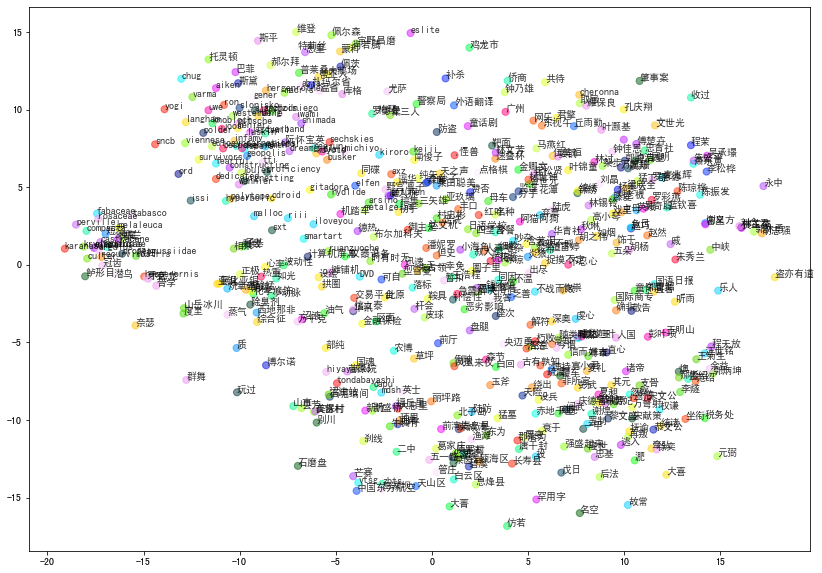

In [49]:
visualizing_word_vectors(n = 500)